### Importings

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix 

import warnings
warnings.filterwarnings("ignore")


2025-05-20 19:35:28.213215: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-20 19:35:28.215427: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 19:35:28.227746: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 19:35:28.267590: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747769728.371910    8431 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747769728.40

# data preprocessing


### Train image preproccesssing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/home/aisssata/Documents/ICRISAT/groundnut-leaf-diseases/image_plant/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1204 files belonging to 5 classes.


2025-05-20 19:37:01.260547: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Validation image preproccessing

In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/home/aisssata/Documents/ICRISAT/groundnut-leaf-diseases/image_plant/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 344 files belonging to 5 classes.


### Test image preprocessing

In [10]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/home/aisssata/Documents/ICRISAT/groundnut-leaf-diseases/image_plant/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 172 files belonging to 5 classes.


In [11]:
print(test_set)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>


## Model building and Compilation

In [12]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=224,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=224,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(units=1500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=5,activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy']
    )

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 222, 222, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 111, 111, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 54, 54, 224)    │       129,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 52, 52, 224)    │       451,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 224)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 256)    │       516,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │    19,201,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         7,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,502,029 (93.47 MB)

 Trainable params: 24,502,029 (93.47 MB)

 Non-trainable params: 0 (0.00 B)

## Model training

In [13]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 521s 13s/step - accuracy: 0.3572 - loss: 2.4146 - val_accuracy: 0.4593 - val_loss: 1.1907
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4241s 114s/step - accuracy: 0.4509 - loss: 1.2562 - val_accuracy: 0.5000 - val_loss: 1.0735
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 625s 16s/step - accuracy: 0.5653 - loss: 0.9873 - val_accuracy: 0.4884 - val_loss: 1.0288
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 38074s 1029s/step - accuracy: 0.6137 - loss: 0.9007 - val_accuracy: 0.5814 - val_loss: 1.0111
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 450s 12s/step - accuracy: 0.7043 - loss: 0.7397 - val_accuracy: 0.7035 - val_loss: 0.7173
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 515s 14s/step - accuracy: 0.7894 - loss: 0.5237 - val_accuracy: 0.7733 - val_loss: 0.5644
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 529s 14s/step - accuracy: 0.8114 - loss: 0.4867 - val_accuracy: 0.6890 - val_loss: 0.7859
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 484s 13s/step - accuracy: 0.8577 - loss: 0.4085 - val_accura

## Model evaluation

In [14]:
# model Evaluation on test set
test_loss, test_acc = model.evaluate(test_set)
print(test_loss, test_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 637ms/step - accuracy: 0.8840 - loss: 0.9056
0.8657068014144897 0.8488371968269348


## Saving Model

In [15]:
model.save("trained_model_1st_draft.h5")

In [16]:
training_history.history

{'accuracy': [0.38372093439102173,
  0.4692690968513489,
  0.5921927094459534,
  0.6536544561386108,
  0.724252462387085,
  0.7956810593605042,
  0.8122923374176025,
  0.8762458562850952,
  0.8970099687576294,
  0.9368770718574524,
  0.9568106532096863,
  0.9634551405906677,
  0.9800664186477661,
  0.9792358875274658,
  0.9767441749572754,
  0.9725913405418396,
  0.9609634280204773,
  0.9883720874786377,
  0.9892026782035828,
  0.9908638000488281,
  0.9991694092750549,
  0.9941860437393188,
  0.9892026782035828,
  0.9792358875274658,
  0.9759136438369751,
  0.9892026782035828,
  0.9767441749572754,
  0.9958471655845642,
  0.9991694092750549,
  0.9958471655845642,
  0.9916943311691284,
  0.9966777563095093,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.7199605703353882,
  1.1985836029052734,
  0.963549017906189,
  0.8474988341331482,
  0.686151385307312,
  0.5203074812889099,
  0.482941746711730

In [17]:
# Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [18]:
training_history.history['accuracy']

[0.38372093439102173,
 0.4692690968513489,
 0.5921927094459534,
 0.6536544561386108,
 0.724252462387085,
 0.7956810593605042,
 0.8122923374176025,
 0.8762458562850952,
 0.8970099687576294,
 0.9368770718574524,
 0.9568106532096863,
 0.9634551405906677,
 0.9800664186477661,
 0.9792358875274658,
 0.9767441749572754,
 0.9725913405418396,
 0.9609634280204773,
 0.9883720874786377,
 0.9892026782035828,
 0.9908638000488281,
 0.9991694092750549,
 0.9941860437393188,
 0.9892026782035828,
 0.9792358875274658,
 0.9759136438369751,
 0.9892026782035828,
 0.9767441749572754,
 0.9958471655845642,
 0.9991694092750549,
 0.9958471655845642,
 0.9916943311691284,
 0.9966777563095093,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

# Accuracy visualization

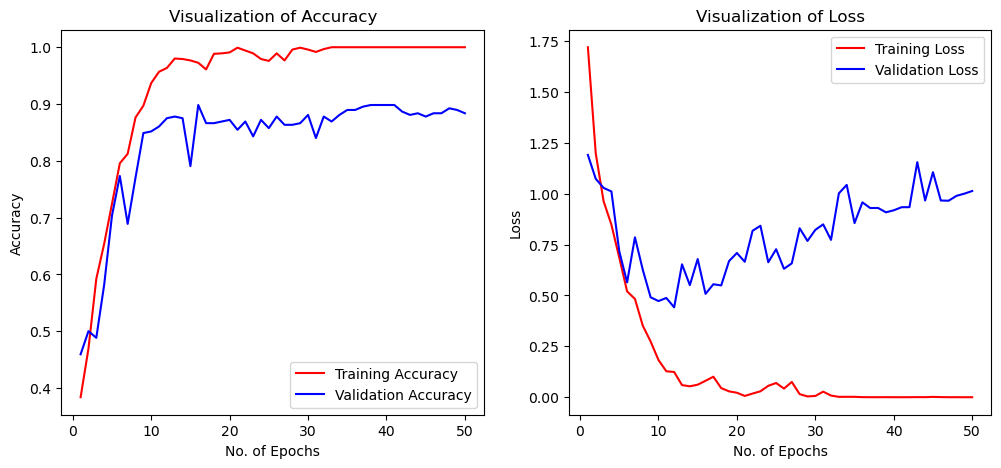

In [19]:
import matplotlib.pyplot as plt

# Génération des epochs
epochs = [i for i in range(1, 51)]

# Création de la figure
plt.figure(figsize=(12, 5))

# Tracé de l'accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy")
plt.legend()

# Tracé de la loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss")
plt.legend()

# Sauvegarde des graphiques
plt.savefig("training_results.png")

# Affichage des graphiques
plt.show()


## Other evaluation metrics

In [41]:
class_name = test_set.class_names
class_name

['ALTERNARIA LEAF SPOT',
 'HEALTHY',
 'LEAF SPOT (EARLY AND LATE)',
 'ROSETTE',
 'RUST']

In [42]:
y_pred = model.predict(test_set)
Y_pred = tf.argmax(y_pred, axis=1)
Y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 837ms/step


<tf.Tensor: shape=(172,), dtype=int64, numpy=
array([1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 1, 1, 3, 3, 1, 1, 3,
       3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 2, 4, 4, 4, 4, 4, 3, 4])>

In [43]:
true_categories = tf.concat([y for _, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

2025-05-21 16:10:23.847579: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(172,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])>

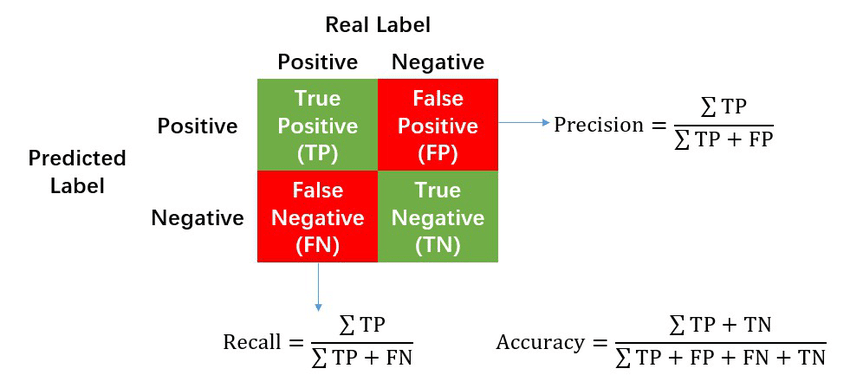

In [44]:
print(classification_report(Y_true,Y_pred,target_names=class_name))

                            precision    recall  f1-score   support

      ALTERNARIA LEAF SPOT       0.95      0.89      0.92        45
                   HEALTHY       0.84      0.95      0.89        60
LEAF SPOT (EARLY AND LATE)       0.85      0.76      0.80        45
                   ROSETTE       0.54      0.70      0.61        10
                      RUST       0.89      0.67      0.76        12

                  accuracy                           0.85       172
                 macro avg       0.81      0.79      0.80       172
              weighted avg       0.86      0.85      0.85       172



In [45]:
cm = confusion_matrix(Y_true, Y_pred) 
cm.shape

(5, 5)

In [50]:
cm

array([[40,  1,  4,  0,  0],
       [ 0, 57,  1,  2,  0],
       [ 2,  8, 34,  1,  0],
       [ 0,  2,  0,  7,  1],
       [ 0,  0,  1,  3,  8]])

## Confusion Matrix visualisation

In [51]:
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix 


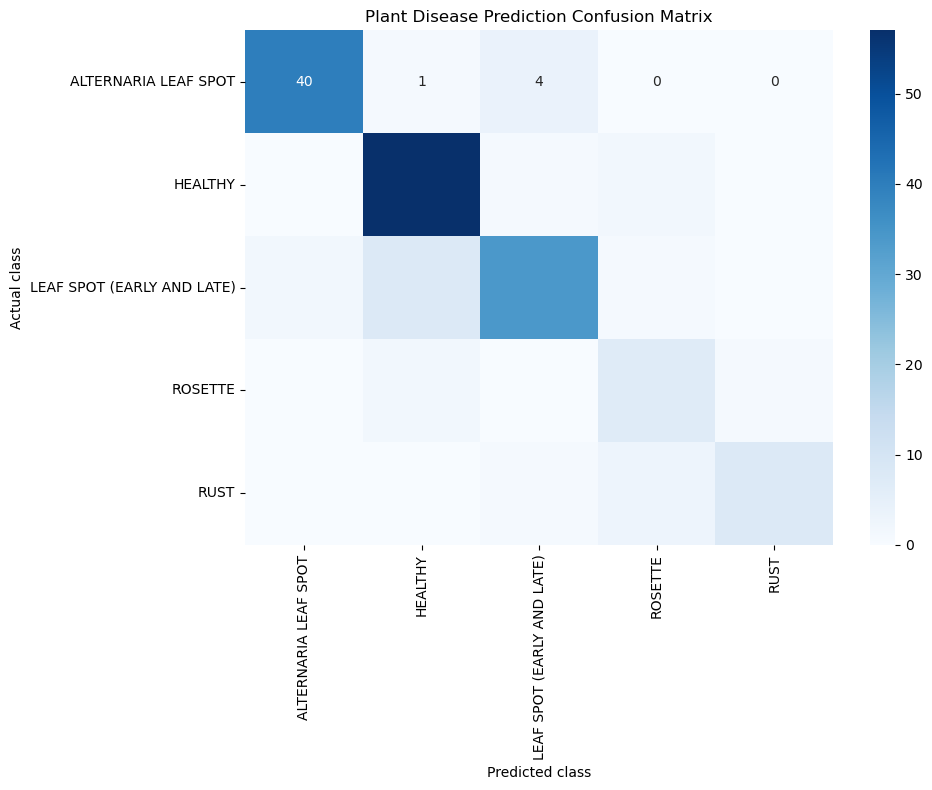

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Define the class names
class_names = [
    "ALTERNARIA LEAF SPOT",
    "HEALTHY",
    "LEAF SPOT (EARLY AND LATE)",
    "ROSETTE",
    "RUST"
]

# The confusion matrix as a NumPy array
cm = np.array([
    [40,  1,  4,  0,  0],
    [ 0, 57,  1,  2,  0],
    [ 2,  8, 34,  1,  0],
    [ 0,  2,  0,  7,  1],
    [ 0,  0,  1,  3,  8]
])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Plant Disease Prediction Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.tight_layout()
plt.show()


In [ ]:
###################################################################################################################

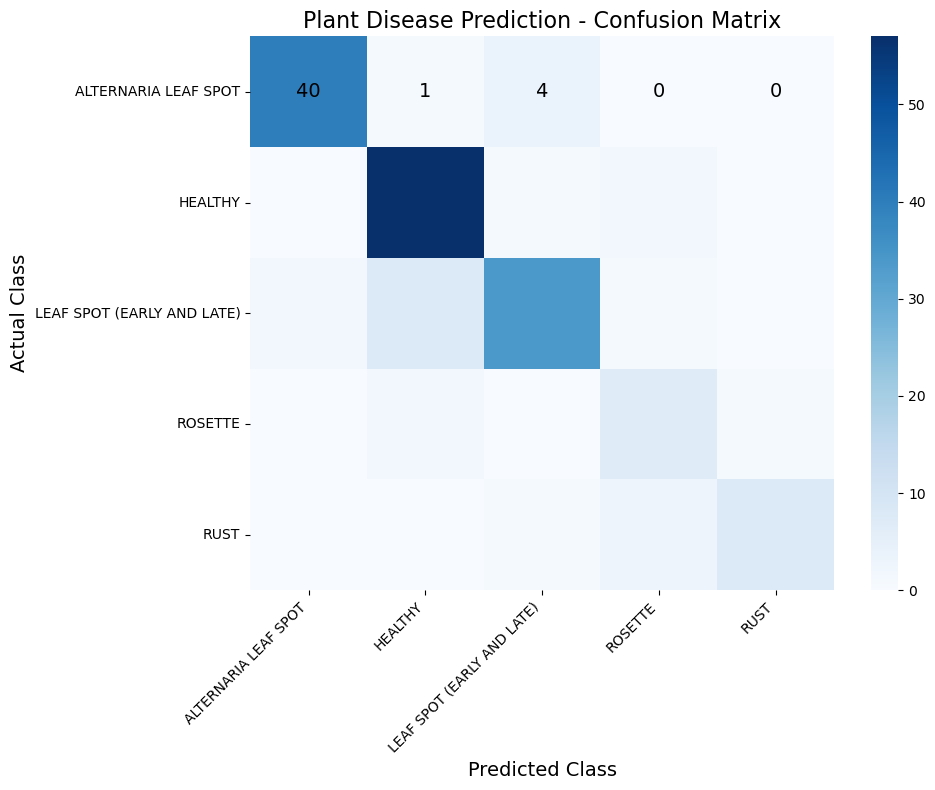

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = np.array([
    [40,  1,  4,  0,  0],
    [ 0, 57,  1,  2,  0],
    [ 2,  8, 34,  1,  0],
    [ 0,  2,  0,  7,  1],
    [ 0,  0,  1,  3,  8]
])

# Class names
class_names = [
    "ALTERNARIA LEAF SPOT",
    "HEALTHY",
    "LEAF SPOT (EARLY AND LATE)",
    "ROSETTE",
    "RUST"
]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=class_names,
                 yticklabels=class_names,
                 annot_kws={"size": 14, "color": "black"})

plt.title("Plant Disease Prediction - Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Class", fontsize=14)
plt.ylabel("Actual Class", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
